##Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Analisis Descriptivo

In [5]:
df = pd.read_csv('../data/raw/work_absenteeism_original.csv')

In [6]:
print("\n🔸 Valores nulos por columna:")
print(df.isnull().sum())

print("\n🔸 Estadísticas descriptivas:")
display(df.describe())



🔸 Valores nulos por columna:
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

🔸 Estadísticas descriptivas:


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


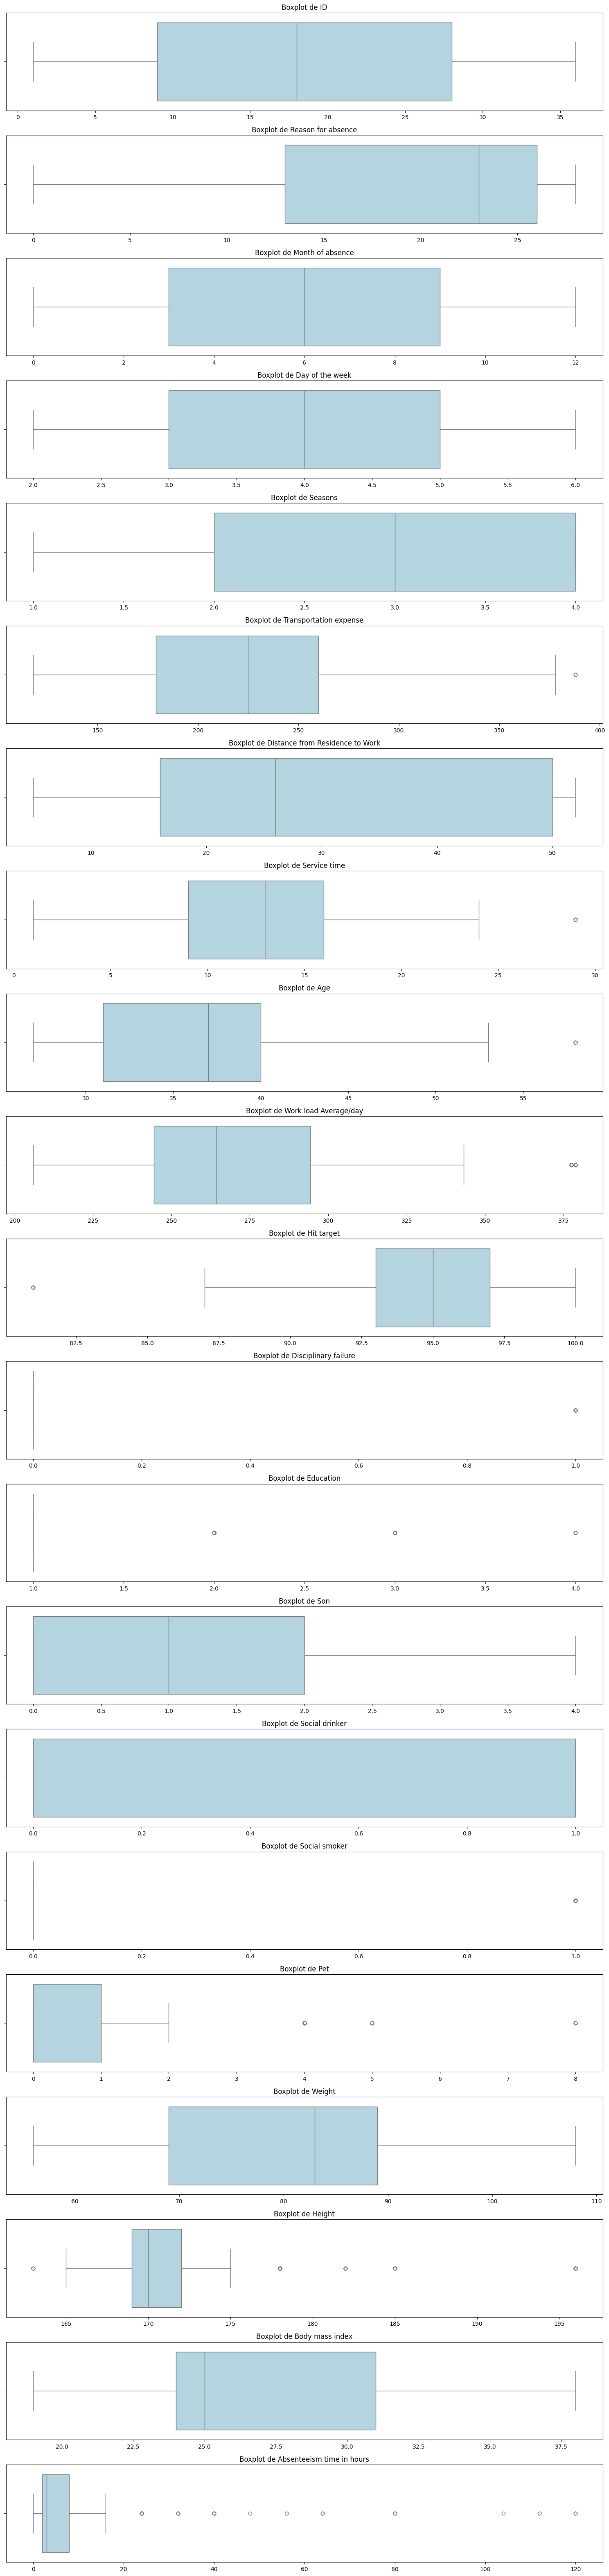

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(num_cols)*3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [16]:
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limites = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    outliers = df[(df[col] < limites[0]) | (df[col] > limites[1])]
    return outliers, limites

for col in num_cols:
    outliers, limites = detectar_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers (límites: {limites})")

ID: 0 outliers (límites: (np.float64(-19.5), np.float64(56.5)))
Reason for absence: 0 outliers (límites: (np.float64(-6.5), np.float64(45.5)))
Month of absence: 0 outliers (límites: (np.float64(-6.0), np.float64(18.0)))
Day of the week: 0 outliers (límites: (np.float64(0.0), np.float64(8.0)))
Seasons: 0 outliers (límites: (np.float64(-1.0), np.float64(7.0)))
Transportation expense: 3 outliers (límites: (np.float64(57.5), np.float64(381.5)))
Distance from Residence to Work: 0 outliers (límites: (np.float64(-35.0), np.float64(101.0)))
Service time: 5 outliers (límites: (np.float64(-1.5), np.float64(26.5)))
Age: 8 outliers (límites: (np.float64(17.5), np.float64(53.5)))
Work load Average/day: 32 outliers (límites: (np.float64(169.64200000000002), np.float64(368.962)))
Hit target: 19 outliers (límites: (np.float64(87.0), np.float64(103.0)))
Disciplinary failure: 40 outliers (límites: (np.float64(0.0), np.float64(0.0)))
Education: 129 outliers (límites: (np.float64(1.0), np.float64(1.0)))
S

##Limpieza de Datos

In [17]:
cat_columns = ['Disciplinary failure','Social drinker','Social smoker','Reason for absence']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_columns = [c for c in num_cols if c not in cat_columns]


In [18]:
##Nulos
df = df.dropna(subset=num_cols)

In [19]:
##Normalización
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [20]:
# Codificación de variables categóricas
encoder = LabelEncoder()
# Aplicar codificación a cada columna categórica
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

##Modelado

In [21]:
# Definir X y y
X = df.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Modelos
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Entrenamiento
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [24]:
# Evaluación
def evaluar(y_true, y_pred):
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

print("📈 Linear Regression:")
evaluar(y_test, y_pred_lr)

print("\n🌲 Random Forest:")
evaluar(y_test, y_pred_rf)

📈 Linear Regression:
MAE: 0.42
RMSE: 0.60
R²: 0.03

🌲 Random Forest:
MAE: 0.38
RMSE: 0.77
R²: -0.25
